## Основы анализа данных

## Домашнее задание 2

### О задании

1) Выберите не менее трех количественных признаков, объясните выбор и примените метод К-средних (для K=5, для K=9). В обоих случаях сделайте порядка 10 случайных инициализаций и выберите то, которое доставляет минимум критерию метода.

2) Проинтерпретируйте оба разбиения с помощью признаков таблицы данных. Объясните, какое из разбиений лучше с точки зрения интерпретации.

3) Для одного из полученных разбиений:

Сравните средние по какому-либо признаку в двух кластерах, используя бутстрэп.

Найдите 95% доверительный интервал для среднего значения какого-либо признака на всем множестве объектов, используя бутстрэп.

Для одного из кластеров сравните среднее на всем множестве для какого-либо признака с его средним внутри кластера, используя бутстрэп.

Примечание: каждое применение бутстрэпа должно быть обоими методами, с опорой и без.

В качестве рассматриваемых для применения метода K-средних на наш взгляд лучше всего подходят те признаки, которые связаны с пространственным расположением объектов. В данных, которые мы исследуем, есть широта и долгота аварий. По нашему предположению, применив метод для широты и долготы, мы можем получить разбиение на города.

Загрузим данные об авариях:

In [130]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score
"""
p1 = pandas.read_csv('../../data/acc1.csv')
p2 = pandas.read_csv('../../data/acc2.csv').query('Longitude>-0.125').query('Latitude<51.470')
p3 = pandas.read_csv('../../data/acc3.csv')
p4 = pandas.read_csv('../../data/Accidents0515.csv').sample(1500)
practice_data = pandas.concat((p1, p2, p3, p4))
"""
practice_data = pandas.read_csv('../../data/homework_2_data.csv').filter(
    items=['Speed_limit', 'Longitude', 'Latitude'])
practice_data.head()

,Speed_limit,Longitude,Latitude
0,30,-0.191170,51.489096
1,30,-0.211708,51.520075
2,30,-0.206458,51.525301
3,30,-0.173862,51.482442
4,30,-0.156618,51.495752


В приведенной выше таблице нас интересуют две колонки: Longitude, Latitude. Давайте визуализируем их.


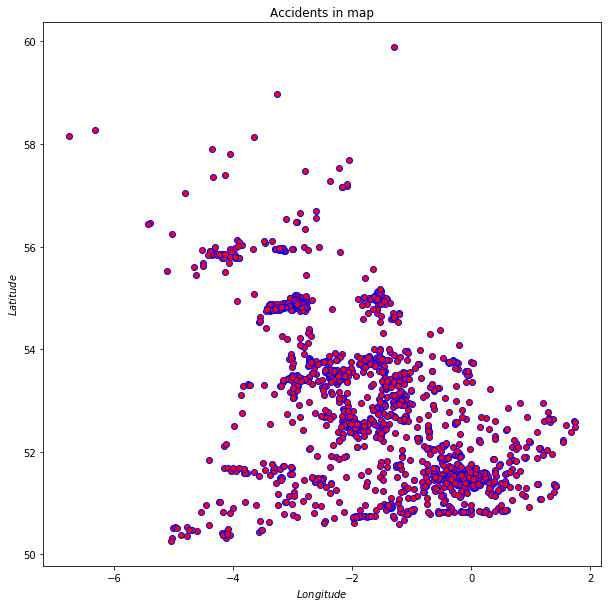

In [131]:
def draw_long_lat_plot():
    fig, (ax1) = plt.subplots(
        nrows=1, ncols=1,
        figsize=(10, 10)
    )

    ax1.scatter(x=practice_data["Longitude"], y=practice_data["Latitude"], c='r', edgecolor='b', alpha=1)
    ax1.set_title('Accidents in map')
    ax1.set_xlabel('$Longitude$')
    ax1.set_ylabel('$Latitude$')
draw_long_lat_plot()

Уже отчетливо видны большие города, например Лондон (внизу справа). Давайте попробуем применить метод K средних для 5и и для 9и кластеров.

In [195]:
def draw_long_lat_city_plot(cities_5, cities_9):
    fig, (ax1, ax2) = plt.subplots(
        nrows=1, ncols=2,
        figsize=(20, 10)
    )

    ax1.scatter(x=practice_data["Longitude"], y=practice_data["Latitude"],
                c=cities_5, edgecolor='b', cmap='Paired', alpha=0.9, linewidths=0.5)
    ax1.set_title('Кластеризация с k = 5')
    ax1.set_xlabel('$Longitude$')
    ax1.set_ylabel('$Latitude$')
    
    ax2.scatter(x=practice_data["Longitude"], y=practice_data["Latitude"],
                c=cities_9, edgecolor='b', cmap='Paired', alpha=0.9, linewidths=0.5)
    ax2.set_title('Кластеризация с k = 9')
    ax2.set_xlabel('$Longitude$')
    ax2.set_ylabel('$Latitude$')

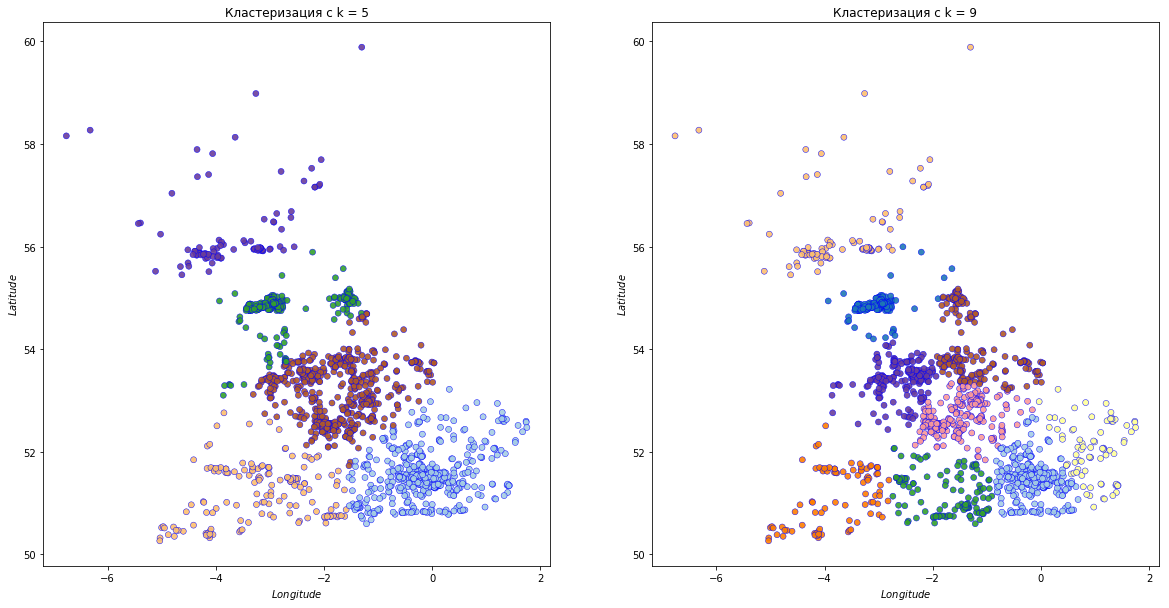

In [196]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

filtered_data = practice_data.filter(items=['Longitude', 'Latitude'])

model_5 = KMeans(n_clusters=5)
model_5.fit(filtered_data)

model_9 = KMeans(n_clusters=9)
model_9.fit(filtered_data)


draw_long_lat_city_plot(model_5.predict(filtered_data), model_9.predict(filtered_data))

Мы решили добавить еще один параметр для 

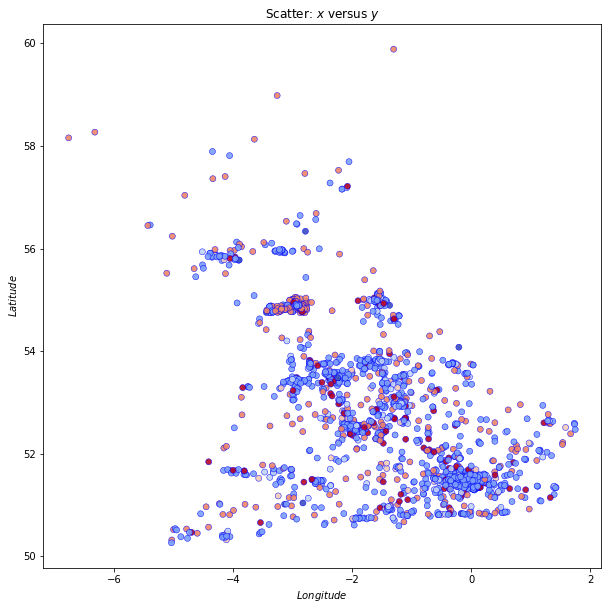

In [181]:
def draw_long_lat_speed_plot():
    fig, (ax1) = plt.subplots(
        nrows=1, ncols=1,
        figsize=(10, 10)
    )

    ax1.scatter(x=practice_data["Longitude"], y=practice_data["Latitude"],
                c=practice_data["Speed_limit"],edgecolor='b', cmap='coolwarm', alpha=0.9, linewidths=0.5)
    ax1.set_title('Scatter: $x$ versus $y$')
    ax1.set_xlabel('$Longitude$')
    ax1.set_ylabel('$Latitude$')
draw_long_lat_speed_plot()

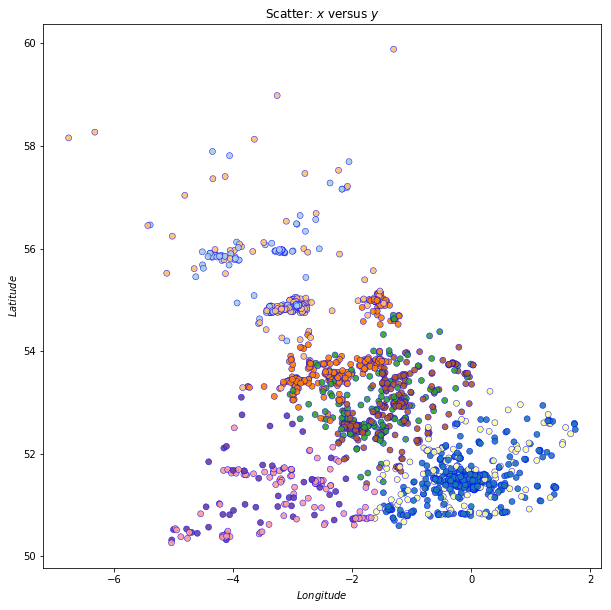

In [185]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(practice_data)
filtered_data = scaler.transform(practice_data)

model_5 = KMeans(n_clusters=9)
model.fit(scaled_data)


draw_long_lat_city_plot(model.predict(scaled_data))